# Baseline Package

##### Imports and Initialization

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ../..

/Users/q/code/gregoirelafay/neural-art


In [3]:
import pandas as pd
import os

In [4]:
MAIN_PATH = "../neural-art/data/wikiart/"
IMAGE_FOLDER_ALL=os.path.join(MAIN_PATH,"dataset")
IMAGE_FOLDER_PATH = os.path.join(MAIN_PATH,"wikiart-movement-genre_True-class_8-merge_mov-1-n_200_max")
IMAGE_FOLDER_PATH_SPLIT = os.path.join(MAIN_PATH,"train_val_test_True_200")
CSV_PATH = os.path.join(MAIN_PATH,"wikiart-movement-genre_True-class_8-merge_mov-1-n_200_max_split.csv")

In [5]:
from neuralart.fourier import *
from neuralart.baseline import *


##### Prediction for a dataset

In [6]:
#Load data
df=pd.read_csv(CSV_PATH)

In [7]:
#Class instance for baseline
baseline=Baseline(df,path=IMAGE_FOLDER_PATH_SPLIT)

In [8]:
#Occurence of paintings in Train set
baseline_mov, baseline_gen = baseline.occurence()
print(baseline_mov)
print(baseline_gen)

{'abstract': 0.125, 'color_field_painting': 0.125, 'cubism': 0.125, 'expressionism': 0.125, 'impressionism': 0.125, 'realism': 0.125, 'renaissance': 0.125, 'romanticism': 0.125}
{'abstract_painting': 0.249375, 'cityscape': 0.049375, 'genre_painting': 0.1175, 'illustration': 0.020625, 'landscape': 0.136875, 'nude_painting': 0.03, 'portrait': 0.1725, 'religious_painting': 0.10125, 'sketch_and_study': 0.0625, 'still_life': 0.06}


In [9]:
#Compute baseline dictionnary for prediction calculations  - not mandatory since this function is integrated in the prediction
basedict=baseline.basedict()

2021-09-02 10:06:14.586013: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-02 10:06:14.586496: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.
/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/PIL/Image.py:2914: DecompressionBombWarning: Image size (107327830 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


In [10]:
#Compute prediction for the entire dataset
prediction=baseline.prediction()

In [11]:
prediction

{'avg_color_pred': 0.18125, 'dom_color_pred': 0.225, 'fft_pred': 0.25}

##### Prediction for an image

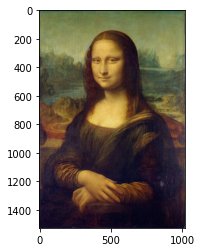

In [12]:
img_name='expressionism_jean-paul-lemieux_jeune-fille-au-chandail-rouge-1974.jpg'
test_img1=plt.imread(IMAGE_FOLDER_ALL+'/'+img_name)

plt.imshow(test_img1);

In [13]:
#Extract colors and shapes from image

test1=baselines_single(test_img1)

2021-09-06 20:13:09.922295: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-06 20:13:09.924838: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


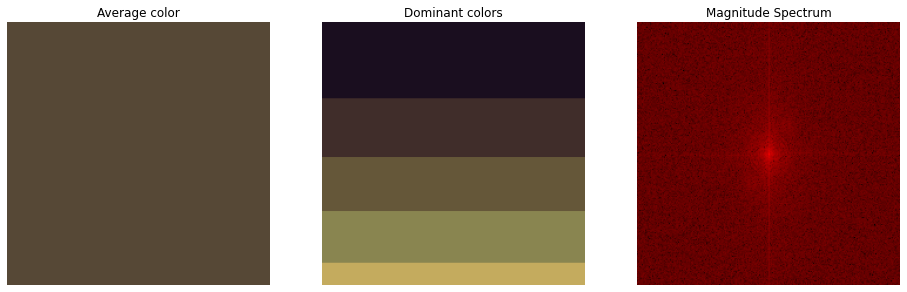

In [21]:
#show image and save analysis
baselines_viz_single(test1,plot_save=False)

In [22]:
#Load baseline dictionnary

base_dict=basedict_loader()

In [23]:
#Make prediction on the image from movements baseline using computed baseline dictionnary

test1_pred_avg=base_pred_avg(test1,base_dict)
test1_pred_dom=base_pred_dom(test1,base_dict)
test1_pred_fft=base_pred_fft(test1,base_dict)
test1_pred_avg,test1_pred_dom,test1_pred_fft

('romanticism', 'renaissance', 'romanticism')